<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/HandsOn_07/CAP417_Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP-345-3 - Computational Estatistis

* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)

These code was provide for [this](https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb) class exercice. 




# Exercice 3 - Pratical
On a given farm, profits depend on rain. Consider the dataset shown here that provides the precipitation (in mm) in one year in the location of the farm. Moreover, consider that the expected profit of the farm is in accordance with the following conditions:


* If the precipitation is over 47 mm, the profit is R$ 50,000.00;

* If the precipitation is between 30 and 47 mm, the profit is R$ 100,000.00;

* If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

* If the precipitation is between 10 and 20 mm, the profit is R$ 35,000.00;

* If the precipitation is between 5 and 10 mm, the profit is R$ -30,000.00;

* If the precipitation is less than 5 mm, the profit is R$ -50,000.00.


Develop a program to solve the questions below:


1. Show that this dataset is normally distributed.
2. Plot the raw data and also the pdf of this dataset.
3. Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?
4. What is the expected profit of this farm?


In [1]:
#Import Librarys
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import collections as matcoll
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import poisson
import math
import seaborn as sns

from scipy.integrate import quad
from scipy.stats import norm

In [2]:
#Reading the data from github
df = pd.read_csv("https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Precipitation/precipitation.csv")

## 1 - Show that this dataset is normally distributed.

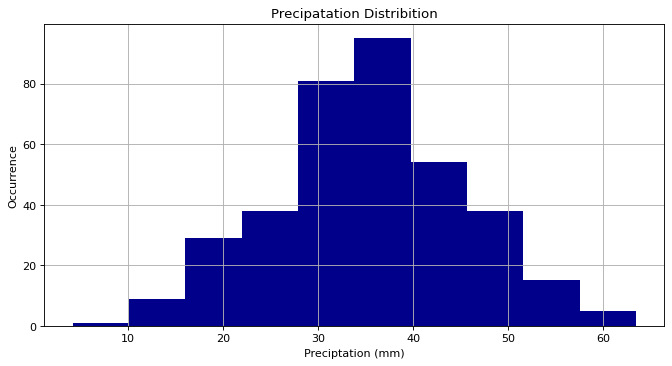

In [8]:
#Creatin Figure Enveirment
figure(figsize=(10, 5), dpi=80)
plt.hist(df['Precipitation'],bins=10,color = 'darkblue')
plt.xlabel('Preciptation (mm)')
plt.ylabel('Occurrence')
plt.title('Precipatation Distribition')
plt.grid()
plt.show()

## 2 - Plot the raw data and also the pdf of this dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


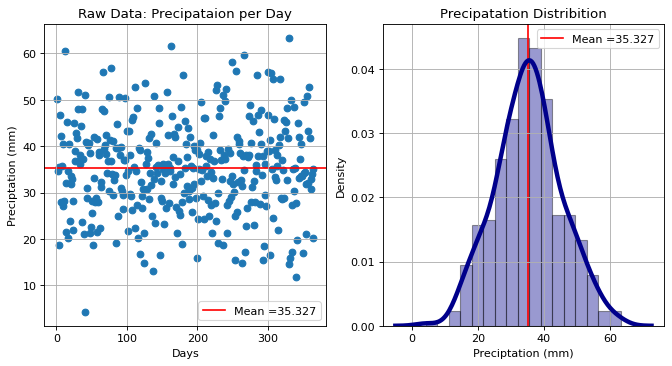

In [4]:
figure(figsize=(10, 5), dpi=80)
plt.subplot(1,2,1)
plt.scatter(df.Day,df.Precipitation)
plt.xlabel('Days')
plt.ylabel('Preciptation (mm)')
plt.title('Raw Data: Precipataion per Day')
plt.axhline(y=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.legend()
plt.grid()



plt.subplot(1,2,2)
sns.distplot(df['Precipitation'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(x=df['Precipitation'].mean(), color='red',label='Mean ='+str(round(df['Precipitation'].mean(),3)),zorder=1)
plt.xlabel('Preciptation (mm)')
plt.ylabel('Density')
plt.title('Precipatation Distribition')
plt.legend()
plt.grid()


plt.show()
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

## 3 - Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?

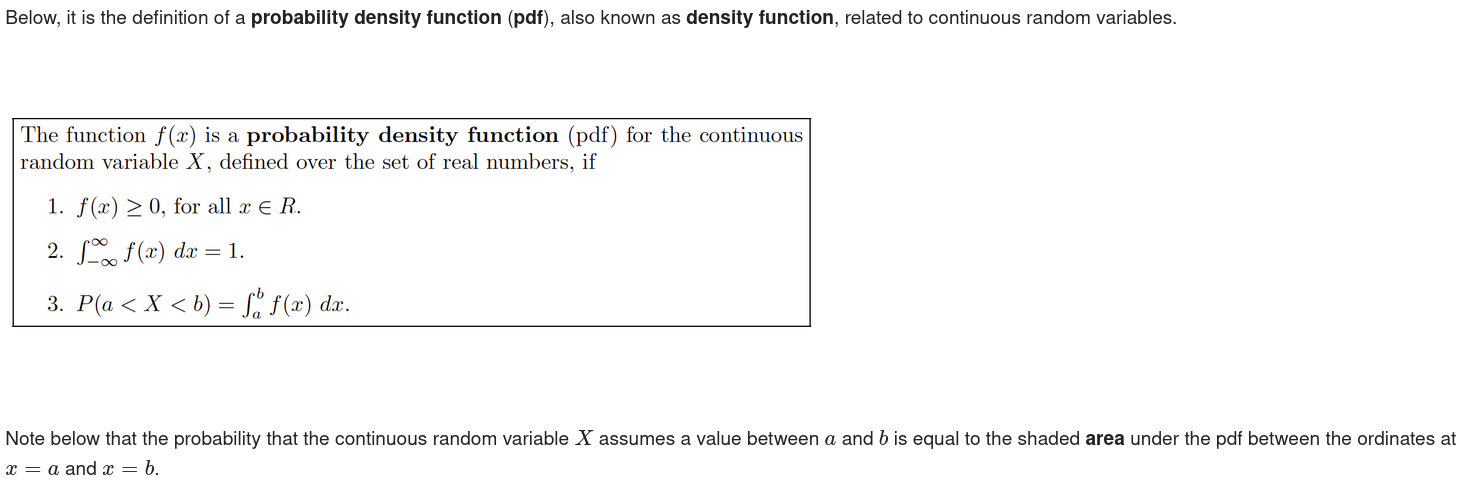

* If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


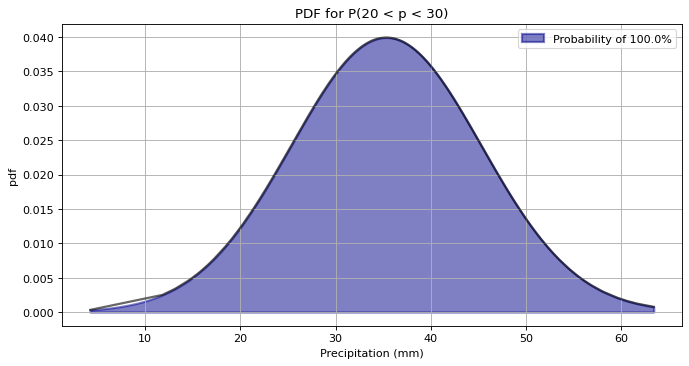

In [7]:
#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
mean = x.mean()
std  = x.std()
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition

# Intervals of Integrations
a,b = min(x),max(x)

# calculating P(a < x < b)
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)

#plot the area
figure(figsize=(10, 5), dpi=80)

# set data
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)

# for fill_between
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, color='darkblue', linewidth=2, label='Probability of '+str(prob*100)+'%')

#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()

As we can see, a complete area of the curvature in question represents a total of 100% probability, checking as a normal function

## 4 - What is the expected profit of this farm?

In [11]:
#I use the calculus references used on the class
#https://github.com/vsantjr/CAP/blob/master/CAP417/Material/CAP-417_Estatistica%20Computacional_Prof%20Valdivino_A03.ipynb

def diff(x1, x2):
  mean1, std1 = mean, std
  cdf_x1,cdf_x2 = norm.cdf(x1,mean1,std1), norm.cdf(x2,mean1,std1)
  z1,z2 = (x1 - mean1)/std1, (x2 - mean1)/std1
  return norm.cdf(z2,0,1) - norm.cdf(z1,0,1)

print('{}% of R$ 50,000.00'.format(round((diff(47,round(max(x))))*100,2)))

print('{}% of R$ 100,000.00'.format(round((diff(30,47))*100,2)))
print('{}% of R$ 80,000.00'.format( round((diff(20,30))*100,2)))
print('{}% of R$ 35,000.00'.format( round((diff(10,20))*100,2)))
print('{}% of R$ -30,000.00'.format(round((diff(5,10))*100,2)))
print('{}% of R$ -50,000.00'.format(round((diff(5,0))*100,2)))


11.85% of R$ 50,000.00
58.19% of R$ 100,000.00
23.45% of R$ 80,000.00
5.68% of R$ 35,000.00
0.44% of R$ -30,000.00
-0.1% of R$ -50,000.00


## EXTRA

Plotting the probability distribution for each rainfall interval

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


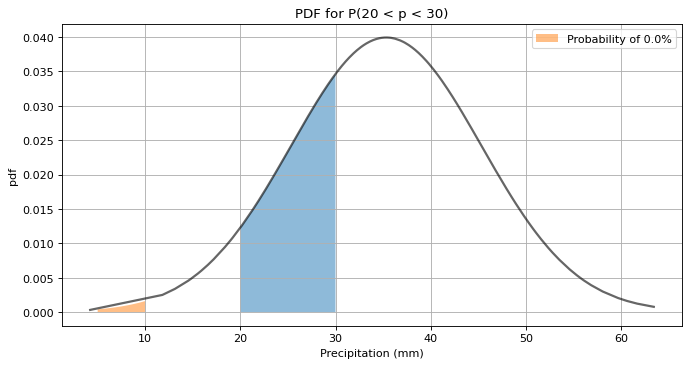

In [10]:

#Calculating the Probability interval

x = df.Precipitation.values  #Alocating the interval
pdf = norm.pdf(x, mean, std) #Calculating the Distribuition


figure(figsize=(10, 5), dpi=80)
#Pdf Curve
axs = sns.lineplot(x, pdf, color='black', alpha=0.6, linewidth=2)





# Intervals of Integrations
a,b = 20,30
px, y= np.arange(a, b, 0.01), norm.pdf(px, mean, std)
#prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='')


# # Intervals of Integrations
# a,b = 2 ,5
# px = np.arange(a, b, 0.01)
# y = norm.pdf(px, mean, std)
# prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
# axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')



# Intervals of Integrations
a,b = 5 ,10
px = np.arange(a, b, 0.01)
y = norm.pdf(px, mean, std)
prob = round(norm(mean,std).cdf(b) - norm(mean,std).cdf(a), 2)
axs.fill_between(px, y, alpha=0.5, linewidth=2, label='Probability of '+str(prob)+'%')




#axs.text(0, 0.15, prob, fontsize=20)

#Create labels 
axs.set_xlabel('Precipitation (mm)')
axs.set_ylabel('pdf')


# set title
plt.title('PDF for P(20 < p < 30)')
plt.grid()
plt.legend()
plt.show()